<a href="https://colab.research.google.com/github/Monisha5621/Data-Science-Portfolio/blob/main/Sentiment_Analysis_taylorswift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Text Mining Project**  
## **By : Monisha Ayelligadala - 21MBMB07 - MBA BA - SMS - UOH**
### Sentiment Analysis on ***#taylorswift*** Tweets

## **Importing Libaries and Performing Sentiment Analysis**

In [ ]:
!pip install tweepy==4.9.0

In [ ]:
import tweepy
import pandas as pd
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


from nltk import PorterStemmer,WordNetLemmatizer

import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
# Authenticate with Twitter OAuth 2.0 Bearer Token (Application-only)
client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAALoijAEAAAAASDFgSEJYGHlrV9qOpKT0dCP3Pm0%3DgQvf9uD5J31DzRP1wNHTRA4oNI0PsJYSfOuytmk8OiQlxHf2lO')

In [ ]:
# Pull tweets from twitter

query = '#taylorswift -is:retweet lang:en'
paginator = tweepy.Paginator(
    client.search_recent_tweets,           # The method you want to use
    query=query,                           # Some argument for this method
    max_results=100,                       # How many tweets per page
    limit=100                               # How many pages to retrieve
)
# Get tweets that contain the hashtag #TypeKeywordHere
# -is:retweet means I don't want retweets
# lang:en is asking for the tweets to be in english


In [ ]:
tweet_list = []

for tweet in paginator.flatten(): # Total number of tweets to retrieve
    tweet_list.append(tweet)
    #print(tweet)

In [ ]:
#Creating new dataframe and new features
tweet_df = pd.DataFrame(tweet_list)
tweet_df = pd.DataFrame(tweet_df['text'])
tweet_df.head(5)

,text
0,Taylor Swift | The Eras Tour Allegiant Stadium...
1,"#TaylorSwift says it was ""excruciating"" to wat..."
2,Selling 3x Taylor Swift TICKETS For her show i...
3,The traffic spike for the Taylor Swift-Eras to...
4,you’re my… BEST FRIEND!! 🥹💌 #taylorswift @tayl...


In [ ]:
tweet_df

,text
0,Taylor Swift | The Eras Tour Allegiant Stadium...
1,"#TaylorSwift says it was ""excruciating"" to wat..."
2,Selling 3x Taylor Swift TICKETS For her show i...
3,The traffic spike for the Taylor Swift-Eras to...
4,you’re my… BEST FRIEND!! 🥹💌 #taylorswift @tayl...
...,...
9943,"Ticketmaster really just said It's me, hi, I'm..."
9944,Screaming crying throwing up 😭 #TaylorSwift #T...
9945,didn’t get picked for pre-sale due to historic...
9946,"It hits different, it hits different this time..."


In [ ]:
def preprocess_tweet(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''

    sentence = sen.lower()

    # Remove RT
    sentence = re.sub('RT @\w+: '," ", sentence)

    # Remove special characters
    sentence = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    return sentence

In [ ]:
cleaned_tweets = []

for tweet in tweet_df['text']:
  cleaned_tweet = preprocess_tweet(tweet)
  cleaned_tweets.append(cleaned_tweet)

In [ ]:
tweet_df['cleaned'] = pd.DataFrame(cleaned_tweets)
tweet_df.head(5)

,text,cleaned
0,Taylor Swift | The Eras Tour Allegiant Stadium...,taylor swift the eras tour allegiant stadium l...
1,"#TaylorSwift says it was ""excruciating"" to wat...",taylorswift says it was excruciating to watch...
2,Selling 3x Taylor Swift TICKETS For her show i...,selling 3x taylor swift tickets for her show i...
3,The traffic spike for the Taylor Swift-Eras to...,the traffic spike for the taylor swift eras to...
4,you’re my… BEST FRIEND!! 🥹💌 #taylorswift @tayl...,you re my best friend taylorswift


In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
#Calculating Negative, Positive, Neutral and Compound values

tweet_df[['polarity', 'subjectivity']] = tweet_df['cleaned'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweet_df['cleaned'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= -0.05:
        tweet_df.loc[index, 'sentiment'] = "negative"
    elif comp >= 0.05:
        tweet_df.loc[index, 'sentiment'] = "positive"
    else:
        tweet_df.loc[index, 'sentiment'] = "neutral"
    tweet_df.loc[index, 'neg'] = neg
    tweet_df.loc[index, 'neu'] = neu
    tweet_df.loc[index, 'pos'] = pos
    tweet_df.loc[index, 'compound'] = comp

tweet_df.head(5)

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Taylor Swift | The Eras Tour Allegiant Stadium...,taylor swift the eras tour allegiant stadium l...,0.400000,0.400000,positive,0.000,0.909,0.091,0.2023
1,"#TaylorSwift says it was ""excruciating"" to wat...",taylorswift says it was excruciating to watch...,0.166667,0.333333,negative,0.198,0.802,0.000,-0.8555
2,Selling 3x Taylor Swift TICKETS For her show i...,selling 3x taylor swift tickets for her show i...,0.125000,0.600000,positive,0.000,0.857,0.143,0.5423
3,The traffic spike for the Taylor Swift-Eras to...,the traffic spike for the taylor swift eras to...,-0.250000,0.250000,positive,0.000,0.765,0.235,0.8225
4,you’re my… BEST FRIEND!! 🥹💌 #taylorswift @tayl...,you re my best friend taylorswift,1.000000,0.300000,positive,0.000,0.351,0.649,0.8126


In [ ]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [ ]:
#Count_values for sentiment
count_values_in_column(tweet_df,"sentiment")

,Total,Percentage
positive,5062,50.88
negative,2688,27.02
neutral,2198,22.09


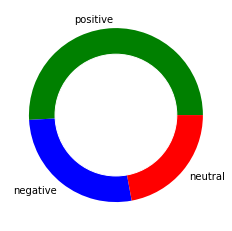

In [ ]:
# create data for Pie Chart
pichart = count_values_in_column(tweet_df,"sentiment")
# names= pc.index
# size=pc["Percentage"]

names= pichart.index
size=pichart["Percentage"]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
#Calculating tweet's lenght and word count
tweet_df['text_len'] = tweet_df['cleaned'].astype(str).apply(len)
tweet_df['text_word_count'] = tweet_df['cleaned'].apply(lambda x: len(str(x).split()))

In [ ]:
round(pd.DataFrame(tweet_df.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,24.94
neutral,16.12
positive,24.27


In [ ]:
tweet_df.to_csv("./sentimentanalysis_output.csv", sep=',', encoding='UTF-8')
tweet_df.head(5)

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count
0,Taylor Swift | The Eras Tour Allegiant Stadium...,taylor swift the eras tour allegiant stadium l...,0.400000,0.400000,positive,0.000,0.909,0.091,0.2023,185,19
1,"#TaylorSwift says it was ""excruciating"" to wat...",taylorswift says it was excruciating to watch...,0.166667,0.333333,negative,0.198,0.802,0.000,-0.8555,247,41
2,Selling 3x Taylor Swift TICKETS For her show i...,selling 3x taylor swift tickets for her show i...,0.125000,0.600000,positive,0.000,0.857,0.143,0.5423,181,31
3,The traffic spike for the Taylor Swift-Eras to...,the traffic spike for the taylor swift eras to...,-0.250000,0.250000,positive,0.000,0.765,0.235,0.8225,242,31
4,you’re my… BEST FRIEND!! 🥹💌 #taylorswift @tayl...,you re my best friend taylorswift,1.000000,0.300000,positive,0.000,0.351,0.649,0.8126,34,6


In [ ]:
from google.colab import files
files.download('./sentimentanalysis_output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

##**Exploratory Data Analysis on Tweets**

In [ ]:
df = pd.read_csv("/content/sentimentanalysis_output.csv")
len(df)

9948

In [ ]:
df['cleaned'] = df['cleaned'].astype(str)

In [ ]:
df = df[~df["cleaned"].isnull()]

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['cleaned'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    taylor swift eras tour allegiant stadium las v...
1    taylorswift says excruciating watch fans strug...
2    selling 3x taylor swift tickets show lumen fie...
3    traffic spike taylor swift eras tour compared ...
4                              best friend taylorswift
Name: cleaned, dtype: object

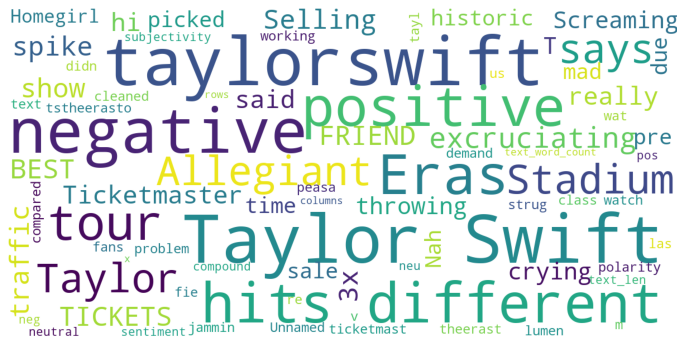

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(df, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1
    ).generate(str(df))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df)

In [ ]:
cleaned = df['cleaned']

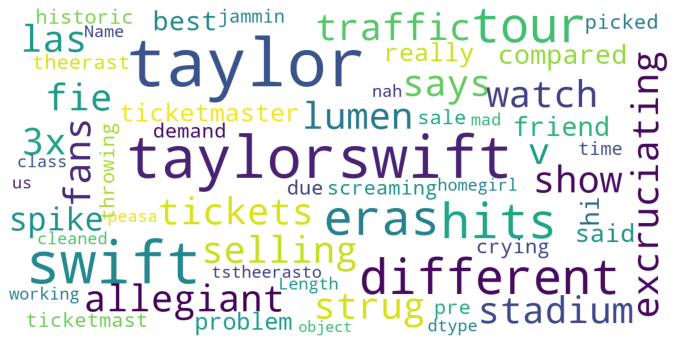

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(cleaned, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1
    ).generate(str(cleaned))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(cleaned)

Less Frequent words are to be deleted

In [ ]:
freq = pd.Series(' '.join(df['cleaned']).split()).value_counts()
less_freq = list(freq[freq ==1].index)
less_freq

In [ ]:
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in less_freq))

##**Stemming**

In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

Remove Punctuations if any

In [ ]:
df['cleaned'] = df['cleaned'].str.replace('[^\w\s]', '')
df['cleaned'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0    taylor swift era tour allegi stadium la vega n...
1    taylorswift say excruci watch fan struggl buy ...
2    sell 3x taylor swift ticket show lumen field s...
3    traffic taylor swift era tour compar ticketmas...
4                              best friend taylorswift
Name: cleaned, dtype: object

## **Polarity check after less frequent words deletion and stemming**

In [ ]:
df['polarity_2'] = df['cleaned'].map(lambda text: TextBlob(text).sentiment.polarity)

In [ ]:
df.head()

,Unnamed: 0,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,polarity_2
0,0,Taylor Swift | The Eras Tour Allegiant Stadium...,taylor swift era tour allegi stadium la vega n...,0.400000,0.400000,positive,0.000,0.909,0.091,0.2023,185,19,0.000000
1,1,"#TaylorSwift says it was ""excruciating"" to wat...",taylorswift say excruci watch fan struggl buy ...,0.166667,0.333333,negative,0.198,0.802,0.000,-0.8555,247,41,0.166667
2,2,Selling 3x Taylor Swift TICKETS For her show i...,sell 3x taylor swift ticket show lumen field s...,0.125000,0.600000,positive,0.000,0.857,0.143,0.5423,181,31,0.000000
3,3,The traffic spike for the Taylor Swift-Eras to...,traffic taylor swift era tour compar ticketmas...,-0.250000,0.250000,positive,0.000,0.765,0.235,0.8225,242,31,-0.250000
4,4,you’re my… BEST FRIEND!! 🥹💌 #taylorswift @tayl...,best friend taylorswift,1.000000,0.300000,positive,0.000,0.351,0.649,0.8126,34,6,1.000000


## **Histograms**

In [ ]:
df.columns

Index(['Unnamed: 0', 'text', 'cleaned', 'polarity', 'subjectivity',
       'sentiment', 'neg', 'neu', 'pos', 'compound', 'text_len',
       'text_word_count', 'polarity_2'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5143625d0>,
      dtype=object)

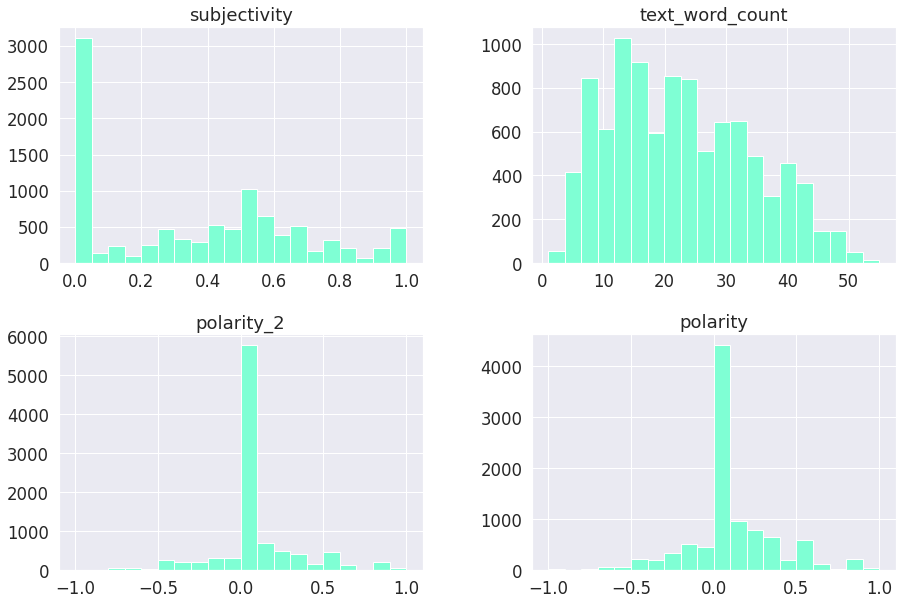

In [ ]:
df[["subjectivity", "text_word_count", "polarity_2", "polarity", ]].hist(bins=20, figsize=(15, 10), color = "aquamarine")

## **Boxplot**

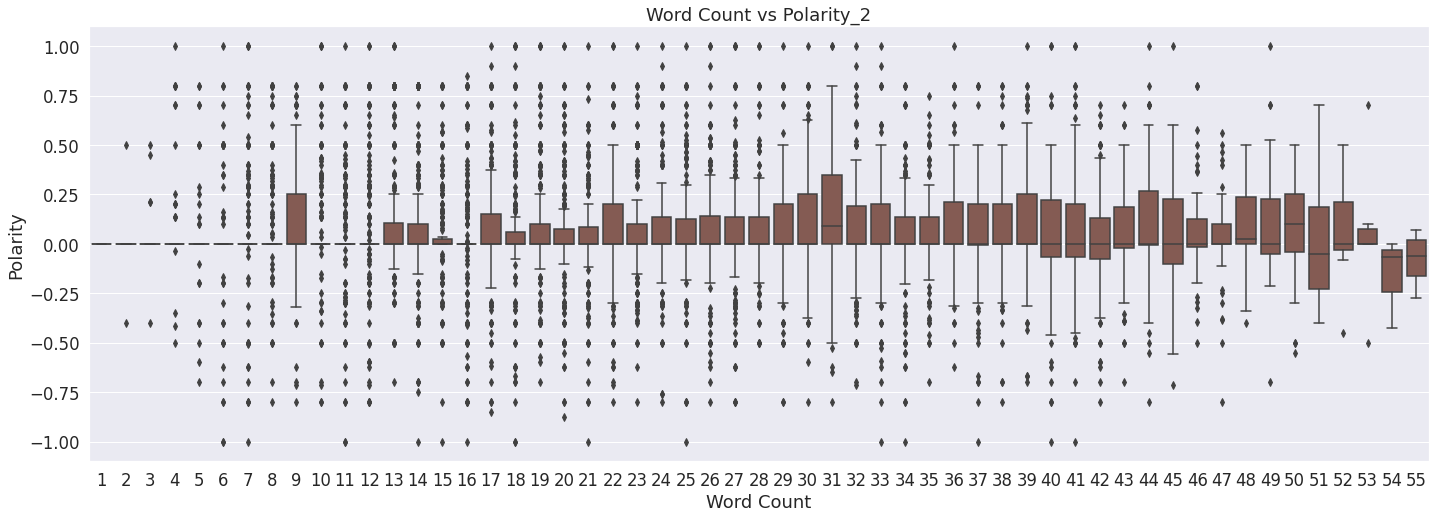

In [ ]:
import matplotlib.colors as mcolors

plt.figure(figsize = (24, 8))
sns.set_style('whitegrid')
sns.set(font_scale = 1.5)
sns.boxplot(x = 'text_word_count', y = 'polarity_2', data = df, color = "tab:brown")
sns.set_color_codes(palette='deep')
plt.xlabel("Word Count")
plt.ylabel("Polarity")
plt.title("Word Count vs Polarity_2")
plt.show()

## **Bar Plot**

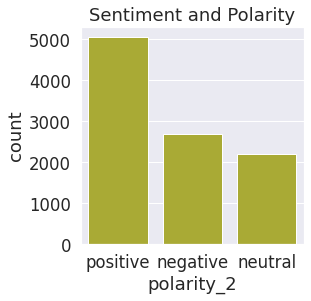

In [ ]:
plt.figure(figsize=(4, 4))
sns.countplot(x='sentiment', data=df, color = "tab:olive" )
plt.xlabel("polarity_2")
plt.title("Sentiment and Polarity")
plt.show()

## **Point Plot**

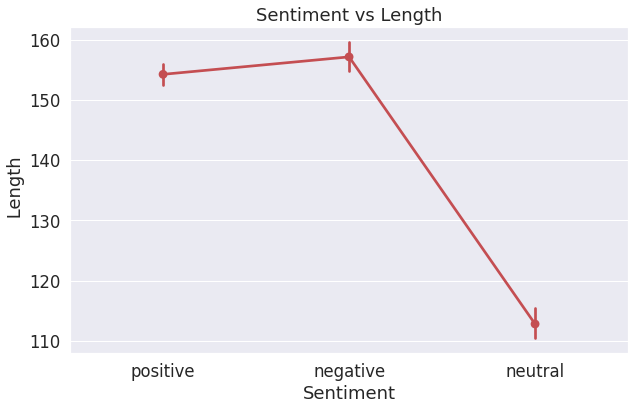

In [ ]:
plt.figure(figsize=(10, 6))
sns.pointplot(x = "sentiment", y = "text_len", data = df,color = "r")
plt.xlabel("Sentiment")
plt.ylabel(" Length")
plt.title("Sentiment vs Length")
plt.show()

## **n-grams**

In [ ]:
text = df['cleaned']

### **uni-gram**

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(text, n=None):
    vec = CountVectorizer().fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
common_words = get_top_n_words(df['cleaned'], 20)
one_gram = pd.DataFrame(common_words, columns = ['cleaned', 'count'])
one_gram


,cleaned,count
0,taylorswift,9993
1,ticket,4702
2,ticketmast,2767
3,taylor,2510
4,swift,1906
5,taylorswifterastour,1643
6,get,1589
7,swifti,1276
8,taylorswifttheerastour,1176
9,erastour,1053


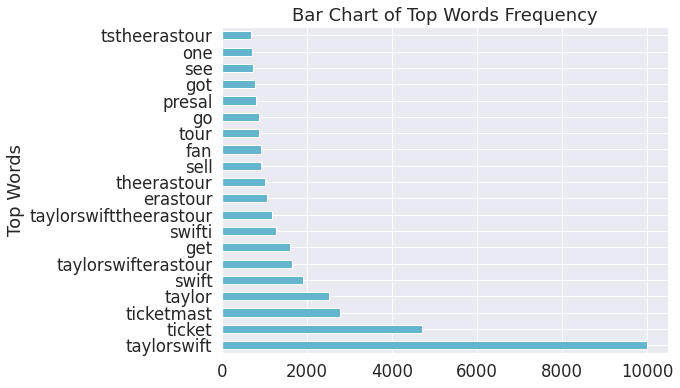

In [ ]:
one_gram.groupby('cleaned').sum()['count'].sort_values(ascending=False).plot(
    kind='barh',
    figsize=(8, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency",
    color = "c"

)

### **bi-gram**

In [ ]:
def get_top_n_bigram(text, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(df['cleaned'], 30)
bigram = pd.DataFrame(common_words2, columns=['cleaned', "Count"])
bigram.head()

,cleaned,Count
0,taylor swift,1794
1,taylorswift taylorswifterastour,673
2,taylorswifterastour taylorswift,597
3,get ticket,513
4,swift ticket,481


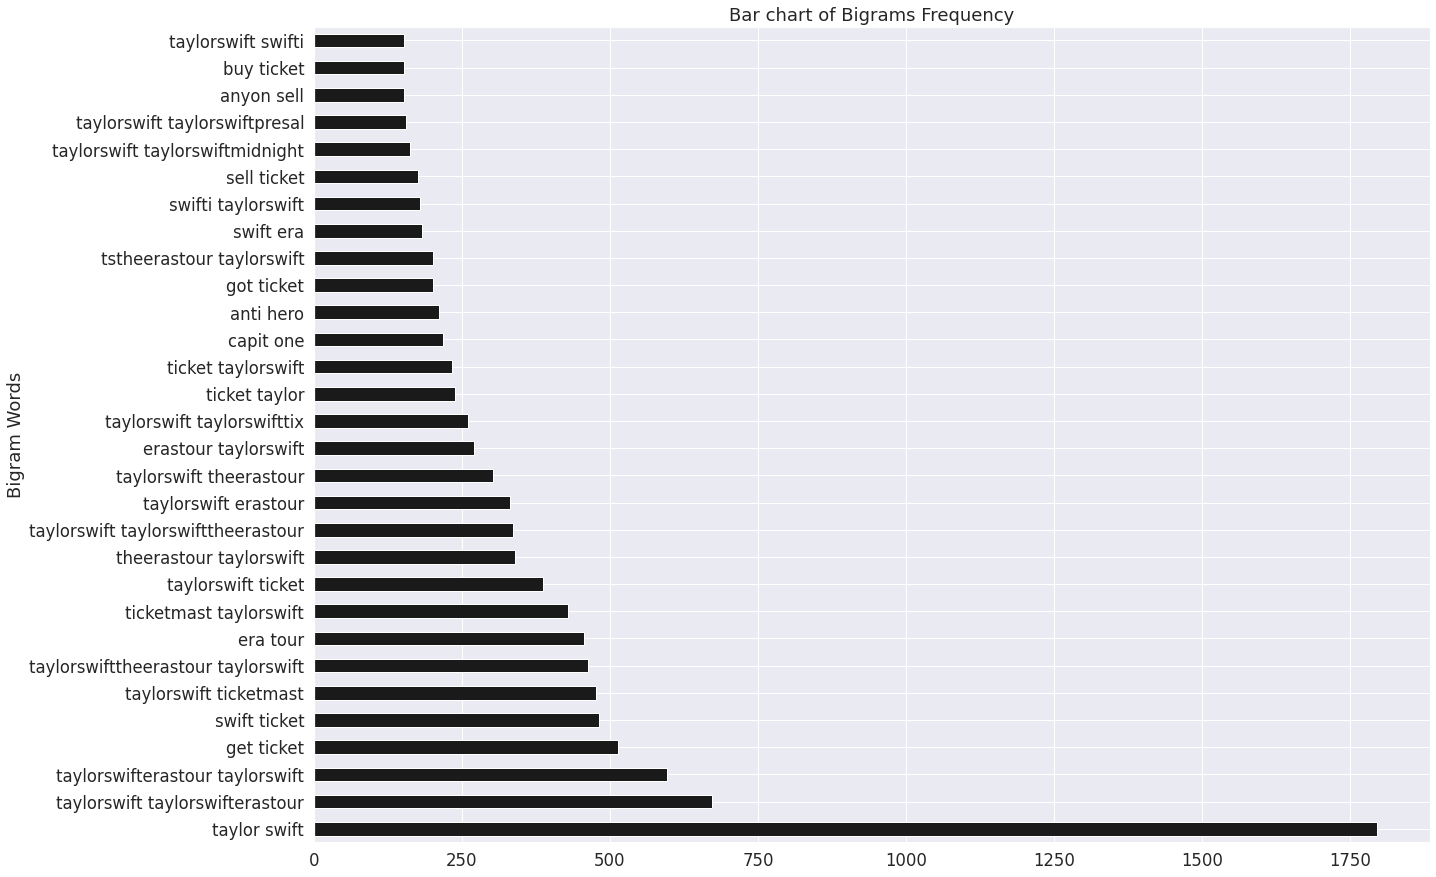

In [ ]:
bigram.groupby('cleaned').sum()['Count'].sort_values(ascending=False).plot(
    kind='barh',
    figsize=(20,15),
    xlabel = "Bigram Words",
    ylabel = "Count",
    title = "Bar chart of Bigrams Frequency",
    color = "k"
)

### **tri-gram**

In [ ]:
def get_top_n_trigram(text, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words3 = get_top_n_trigram(df['cleaned'], 30)
trigram = pd.DataFrame(common_words3, columns = ['cleaned' , 'Count'])
trigram


,cleaned,Count
0,taylor swift ticket,470
1,ticket taylor swift,248
2,taylor swift era,180
3,swift era tour,168
4,sell taylor swift,129
5,taylor swift taylorswift,97
6,taylor swift concert,93
7,justinbieb selenagomez taylorswift,83
8,selenagomez taylorswift billieeilish,83
9,taylorswift billieeilish harrystyl,83


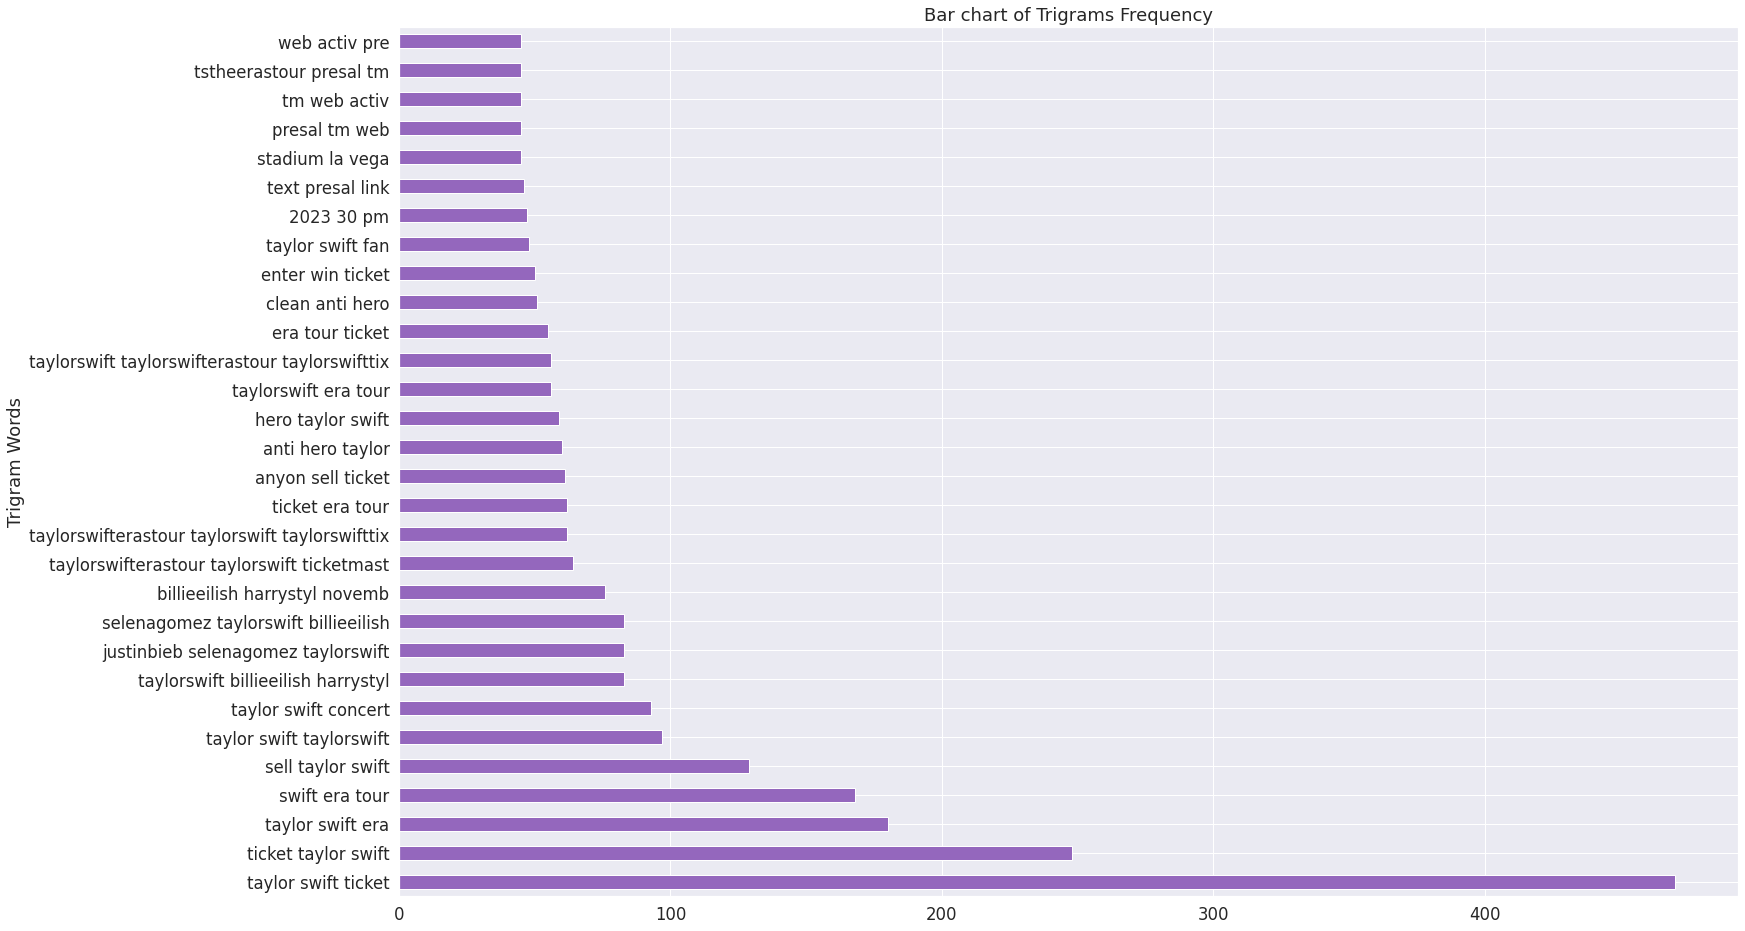

In [ ]:
trigram.groupby('cleaned').sum()['Count'].sort_values(ascending=False).plot(
    kind='barh',
    figsize=(24,16),
    xlabel = "Trigram Words",
    ylabel = "Count",
    title = "Bar chart of Trigrams Frequency",
    color = "tab:purple"
)

## **Word Clouds**

In [ ]:
text_only = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(text))

## **Word Cloud of Taylor Swift Silhouette**

In [ ]:
from os import path
from PIL import Image
import os

from wordcloud import WordCloud, STOPWORDS

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
# read the mask image
taylor_mask = np.array(Image.open(path.join(d, "/content/taylorswift.jpg")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="black", max_words=2000, height=1500, width=4000, mask=taylor_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(text_only)

# store to file
wc.to_file(path.join(d, "taylor.png"))



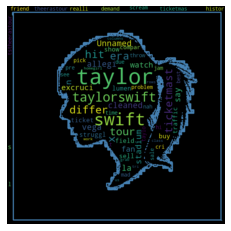

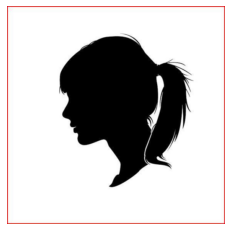

<Figure size 720x1440 with 0 Axes>

In [ ]:
# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(taylor_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(10,20))
plt.show()

## **Word Cloud in a shape of triangle**

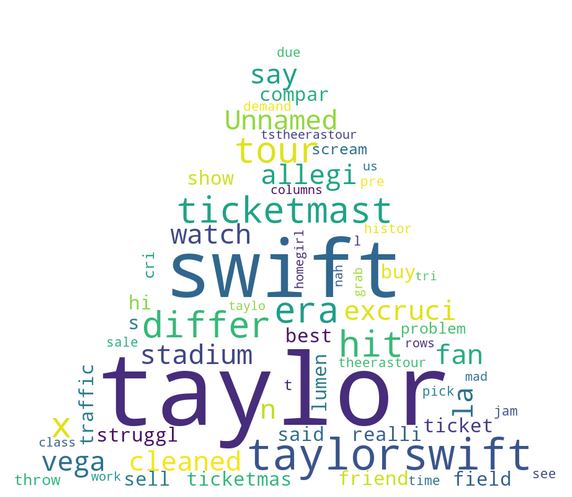

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

Mask = np.array(Image.open(r'/content/traiangle.jpg'))

image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library
wc = WordCloud(background_color='white', height=1500, width=4000,mask=Mask).generate(text_only)

plt.figure(figsize=(10,20))

# interpolation is used to smooth the image generated
plt.imshow(wc.recolor(),interpolation="spline36")

#'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
#           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
#           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'

plt.axis('off')
plt.show()

In [ ]:
df['sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [ ]:
positive_words = df[df["sentiment"] ==  'positive']


In [ ]:
positive_text_only = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(positive_words['cleaned']))

In [ ]:
negative_words = df[df["sentiment"] ==  'negative']


In [ ]:
negative_text_only = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(negative_words['cleaned']))

## **Word Cloud of Positive Sentiment DataFrame**

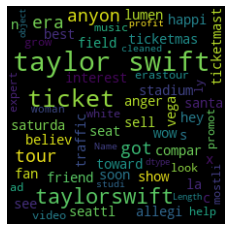

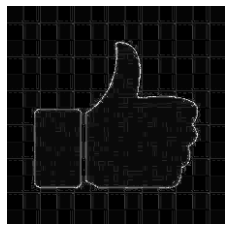

<Figure size 720x1440 with 0 Axes>

In [ ]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
positive_mask = np.array(Image.open(path.join(d, "/content/like.png")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="black", max_words=2000, height=5000, width=4000, mask=positive_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(positive_text_only)

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(positive_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(10,20))
plt.show()


## **Word Cloud of Dislike Symbol of Negative Sentiment DataFrame**

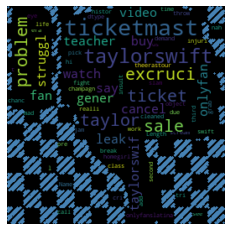

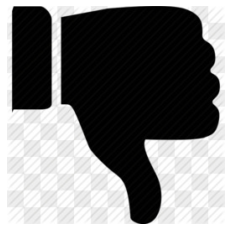

<Figure size 720x1440 with 0 Axes>

In [ ]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
negative_mask = np.array(Image.open(path.join(d, "/content/dislike_1.jpg")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="black", max_words=2000, height=1500, width=4000, mask=negative_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(negative_text_only)

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(negative_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(10,20))
plt.show()
